In [16]:
## Machine Learning on combined USA crime data 
##
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
url_AllCleanedandShaped = 'https://raw.githubusercontent.com/maireadmanifold/files/main/AllCleanedandShapedCSV_Dec11.csv'
df_ML = pd.read_csv(url_AllCleanedandShaped, error_bad_lines=False, index_col=0)



In [17]:
print("No of rows", df_ML.shape)
df_ML.head()

No of rows (5309, 71)


,NAME,DP02_0008PE-%F-led HHs No H,DP02_0010PE-% Non-Fam HHs,DP02_0022PE-%Non Rel in Hs,DP02_0038E-per1000-F-U-RecentPreg,DP02_0046PE-%GPwParent&Gc1-2yrs,DP02_0048PE--%GPwParent&Gc>5yrs,DP02_0060PE-%NoSchDiploma,DP02_0063PE-%AssDeg,DP02_0079PE-% SameHouse_1YrAgo,DP02_0085PE-%LivAbroad1YrAgo,DP02_0088PE-%BornUS,DP02_0112PE-HomeLangNotEng,DP02_0134PE-%IrishAnc,DP03_0009PE-%Unemploy,"DP03_0027PE-%WorkingMgt,Bus,Sc,Arts",DP03_0028PE%WorkingService,DP03_0037PE-Retail,DP03_0040PE-%Fin&Ins,"DP03_0041PE-%ProfSc,Mgt,Admin",DP03_0050PE-%UnpaidFamilyWk,DP03_0052PE-Inc<10k,DP03_0054PE-Inc15-24k,DP03_0058PE-Inc75-99k,DP03_0061PE-Inc200k>,DP03_0066PE-%HHsWithSocSec,DP03_0072PE-%HH Inc with Cash public Ass,DP03_0074PE-%HH Inc with Food Stamps SNAP,DP03_0085PE-%Families Inc>200k,DP03_0097PE-%PHI-Priv,DP03_0098PE-%PHI-Pub,DP03_0099PE-No PHI,DP03_0119PE-% Fam <Pov,DP03_0121PE-%Fam with child U18&U5 <pov,DP03_0126PE-%F-Led Families with u18 <pov,DP04_0002PE-%Occ H U,DP04_0004E-%Ow Vac Rate,DP04_0005E-%Rn Vac Rate,DP04_0013PE-%20+HU,DP04_0017PE-%Built2014+,DP04_0029PE-%2rooms_only_HU,DP04_0039PE-Zero bedrooms,DP04_0046PE-%Owner Occup HU,DP04_0049E-Renter Ave Household size,DP04_0051PE-%moved since 2017+,DP04_0054PE-%moved 2000 to 2009,DP04_0082PE-%Value 50-99k,DP04_0083PE-%Value 100-149k,DP04_0084PE-%Value 150-199k,DP04_0087PE-%Value 500k-1m,DP05_0005PE-%under 5 yrs,DP05_0023PE-%62 yrs+,DP05_0058PE-% w & B or AM,DP05_0061PE-%White & Asian,DP05_0064PE-%White with others,crime,%DP03_0092E-Median Earning Workers,%DP03_0093E-Median Earnings Male FT Workers,%DP03_0094E-Median Earnings Female FT Workers,%DP04_0101E-Med Onwer Monthly Mortgage,%DP04_0134E-Median Gross Rent,%DP05_0070PE-%H&L race,%DP04_0045PE-%Occup HU,%DP02_0015E-Avg HH Size,%DP02_0016E-Avg Fam Size,COUNTYFP,TRACTCE,STATEFP,index,AFFGEOID,GEOID
0,"Census Tract 429.02, Bronx County, New York",25.1,39.5,4.5,92.0,23.0,10.9,16.2,6.2,84.9,1.2,51.0,65.9,3.7,18.1,23.4,28.0,13.6,1.8,15.2,0.0,11.8,14.1,7.5,0.0,18.7,18.9,44.7,0.0,37.7,37.7,11.9,37.6,37.0,71.6,97.1,0.0,2.1,77.2,3.2,4.4,5.5,9.8,2.05,5.7,23.0,43.3,0.0,0.0,14.0,9.9,13.7,2.3,0.2,14.0,low,72.502944,97.848584,73.337346,148.366778,112.093990,98.160320,100.0,90.080656,96.608555,5,42902,36,2436,1400000US36005042902,36005042902
1,"Census Tract 330, Bronx County, New York",12.3,32.7,4.6,104.0,0.0,0.0,6.4,7.7,90.4,0.0,45.5,73.8,1.7,14.7,23.4,26.5,17.7,6.6,9.3,0.0,10.1,12.8,7.9,0.0,18.0,5.1,35.5,0.0,38.0,38.0,17.3,18.1,11.5,76.0,95.1,0.0,3.5,66.9,0.9,1.2,10.0,4.9,3.32,1.6,46.6,18.1,0.0,0.0,5.7,6.9,15.8,0.0,0.0,50.0,high,91.666243,87.352318,80.463775,NaN,99.841471,137.377760,100.0,97.118208,97.748479,5,33000,36,1667,1400000US36005033000,36005033000
2,"Census Tract 358, Bronx County, New York",23.1,22.8,6.6,84.0,0.0,5.7,6.0,11.0,89.6,0.4,53.1,30.0,0.0,11.1,38.7,24.6,11.7,6.9,5.6,0.0,2.0,7.6,16.2,7.1,35.2,0.0,15.5,8.4,70.1,70.1,4.3,5.5,9.8,0.0,95.8,1.6,3.5,3.1,0.0,0.9,2.9,65.9,3.34,1.9,30.7,1.1,0.0,0.0,18.6,5.4,19.0,0.0,0.0,10.4,low,109.079761,105.321965,105.806697,115.169251,118.468611,188.010277,100.0,115.063963,104.303041,5,35800,36,4048,1400000US36005035800,36005035800
3,"Census Tract 371, Bronx County, New York",20.2,48.9,3.8,54.0,4.8,0.0,19.6,5.1,94.0,1.2,55.5,67.3,0.8,7.2,10.5,41.1,17.2,7.1,4.8,0.0,13.5,13.1,5.2,1.5,33.0,7.5,53.6,1.4,40.8,40.8,6.2,24.2,0.0,29.4,95.1,0.0,1.5,63.2,0.0,1.8,19.9,10.4,4.02,3.5,41.1,0.0,5.5,0.0,30.9,6.2,20.5,1.1,0.0,27.3,low,88.540912,124.649755,70.359553,94.073286,65.815895,100.891534,100.0,86.561881,104.873003,5,37100,36,4049,1400000US36005037100,36005037100
4,"Census Tract 385, Bronx County, New York",38.9,38.6,4.0,49.0,0.0,17.6,23.1,7.0,90.5,0.9,61.7,67.9,0.4,13.2,10.6,46.2,15.7,3.1,7.7,0.0,25.1,17.1,3.1,0.8,18.9,9.7,60.5,0.4,21.8,21.8,16.8,44.6,55.0,59.5,91.5,52.7,4.0,72.9,0.0,4.4,12.7,1.6,2.19,2.9,26.7,26.9,0.0,0.0,0.0,12.4,12.2,0.2,0.0,8.3,high,62.847123,59.794228,73.704818,112.430046,85.602057,111.046050,100.0,98.525718,106.867870,5,38500,36,2429,1400000US36005038500,36005038500


In [18]:
df_ML["State"] = df_ML["STATEFP"]
df_ML["County"] = df_ML["COUNTYFP"]
df_ML["Tract"] = df_ML["TRACTCE"]

In [19]:
df_ML.drop('STATEFP', inplace=True, axis=1)
df_ML.drop('COUNTYFP', inplace=True, axis=1)
df_ML.drop('TRACTCE', inplace=True, axis=1)

In [20]:
df_ML

,NAME,DP02_0008PE-%F-led HHs No H,DP02_0010PE-% Non-Fam HHs,DP02_0022PE-%Non Rel in Hs,DP02_0038E-per1000-F-U-RecentPreg,DP02_0046PE-%GPwParent&Gc1-2yrs,DP02_0048PE--%GPwParent&Gc>5yrs,DP02_0060PE-%NoSchDiploma,DP02_0063PE-%AssDeg,DP02_0079PE-% SameHouse_1YrAgo,DP02_0085PE-%LivAbroad1YrAgo,DP02_0088PE-%BornUS,DP02_0112PE-HomeLangNotEng,DP02_0134PE-%IrishAnc,DP03_0009PE-%Unemploy,"DP03_0027PE-%WorkingMgt,Bus,Sc,Arts",DP03_0028PE%WorkingService,DP03_0037PE-Retail,DP03_0040PE-%Fin&Ins,"DP03_0041PE-%ProfSc,Mgt,Admin",DP03_0050PE-%UnpaidFamilyWk,DP03_0052PE-Inc<10k,DP03_0054PE-Inc15-24k,DP03_0058PE-Inc75-99k,DP03_0061PE-Inc200k>,DP03_0066PE-%HHsWithSocSec,DP03_0072PE-%HH Inc with Cash public Ass,DP03_0074PE-%HH Inc with Food Stamps SNAP,DP03_0085PE-%Families Inc>200k,DP03_0097PE-%PHI-Priv,DP03_0098PE-%PHI-Pub,DP03_0099PE-No PHI,DP03_0119PE-% Fam <Pov,DP03_0121PE-%Fam with child U18&U5 <pov,DP03_0126PE-%F-Led Families with u18 <pov,DP04_0002PE-%Occ H U,DP04_0004E-%Ow Vac Rate,DP04_0005E-%Rn Vac Rate,DP04_0013PE-%20+HU,DP04_0017PE-%Built2014+,DP04_0029PE-%2rooms_only_HU,DP04_0039PE-Zero bedrooms,DP04_0046PE-%Owner Occup HU,DP04_0049E-Renter Ave Household size,DP04_0051PE-%moved since 2017+,DP04_0054PE-%moved 2000 to 2009,DP04_0082PE-%Value 50-99k,DP04_0083PE-%Value 100-149k,DP04_0084PE-%Value 150-199k,DP04_0087PE-%Value 500k-1m,DP05_0005PE-%under 5 yrs,DP05_0023PE-%62 yrs+,DP05_0058PE-% w & B or AM,DP05_0061PE-%White & Asian,DP05_0064PE-%White with others,crime,%DP03_0092E-Median Earning Workers,%DP03_0093E-Median Earnings Male FT Workers,%DP03_0094E-Median Earnings Female FT Workers,%DP04_0101E-Med Onwer Monthly Mortgage,%DP04_0134E-Median Gross Rent,%DP05_0070PE-%H&L race,%DP04_0045PE-%Occup HU,%DP02_0015E-Avg HH Size,%DP02_0016E-Avg Fam Size,index,AFFGEOID,GEOID,State,County,Tract
0,"Census Tract 429.02, Bronx County, New York",25.1,39.5,4.5,92.0,23.0,10.9,16.2,6.2,84.9,1.2,51.0,65.9,3.7,18.1,23.4,28.0,13.6,1.8,15.2,0.0,11.8,14.1,7.5,0.0,18.7,18.9,44.7,0.0,37.7,37.7,11.9,37.6,37.0,71.6,97.1,0.0,2.1,77.2,3.2,4.4,5.5,9.8,2.05,5.7,23.0,43.3,0.0,0.0,14.0,9.9,13.7,2.3,0.2,14.0,low,72.502944,97.848584,73.337346,148.366778,112.093990,98.160320,100.0,90.080656,96.608555,2436,1400000US36005042902,36005042902,36,5,42902
1,"Census Tract 330, Bronx County, New York",12.3,32.7,4.6,104.0,0.0,0.0,6.4,7.7,90.4,0.0,45.5,73.8,1.7,14.7,23.4,26.5,17.7,6.6,9.3,0.0,10.1,12.8,7.9,0.0,18.0,5.1,35.5,0.0,38.0,38.0,17.3,18.1,11.5,76.0,95.1,0.0,3.5,66.9,0.9,1.2,10.0,4.9,3.32,1.6,46.6,18.1,0.0,0.0,5.7,6.9,15.8,0.0,0.0,50.0,high,91.666243,87.352318,80.463775,NaN,99.841471,137.377760,100.0,97.118208,97.748479,1667,1400000US36005033000,36005033000,36,5,33000
2,"Census Tract 358, Bronx County, New York",23.1,22.8,6.6,84.0,0.0,5.7,6.0,11.0,89.6,0.4,53.1,30.0,0.0,11.1,38.7,24.6,11.7,6.9,5.6,0.0,2.0,7.6,16.2,7.1,35.2,0.0,15.5,8.4,70.1,70.1,4.3,5.5,9.8,0.0,95.8,1.6,3.5,3.1,0.0,0.9,2.9,65.9,3.34,1.9,30.7,1.1,0.0,0.0,18.6,5.4,19.0,0.0,0.0,10.4,low,109.079761,105.321965,105.806697,115.169251,118.468611,188.010277,100.0,115.063963,104.303041,4048,1400000US36005035800,36005035800,36,5,35800
3,"Census Tract 371, Bronx County, New York",20.2,48.9,3.8,54.0,4.8,0.0,19.6,5.1,94.0,1.2,55.5,67.3,0.8,7.2,10.5,41.1,17.2,7.1,4.8,0.0,13.5,13.1,5.2,1.5,33.0,7.5,53.6,1.4,40.8,40.8,6.2,24.2,0.0,29.4,95.1,0.0,1.5,63.2,0.0,1.8,19.9,10.4,4.02,3.5,41.1,0.0,5.5,0.0,30.9,6.2,20.5,1.1,0.0,27.3,low,88.540912,124.649755,70.359553,94.073286,65.815895,100.891534,100.0,86.561881,104.873003,4049,1400000US36005037100,36005037100,36,5,37100
4,"Census Tract 385, Bronx County, New York",38.9,38.6,4.0,49.0,0.0,17.6,23.1,7.0,90.5,0.9,61.7,67.9,0.4,13.2,10.6,46.2,15.7,3.1,7.7,0.0,25.1,17.1,3.1,0.8,18.9,9.7,60.5,0.4,21.8,21.8,16.8,44.6,55.0,59.5,91.5,52.7,4.0,72.9,0.0,4.4,12.7,1.6,2.19,2.9,26.7,26.9,0.0,0.0,0.0,12.4,12.2,0.2,0.0,8.3,high,62.847123,59.794228,73.704818,112.430046,85.602057,111.046050,100.0,98.525718,106.867870,2429,1400000US36005038500,36005038500,36,5,38500
...,...,...,...,...,...,...,...,.

In [21]:
df_ML.describe()

,DP02_0008PE-%F-led HHs No H,DP02_0010PE-% Non-Fam HHs,DP02_0022PE-%Non Rel in Hs,DP02_0038E-per1000-F-U-RecentPreg,DP02_0046PE-%GPwParent&Gc1-2yrs,DP02_0048PE--%GPwParent&Gc>5yrs,DP02_0060PE-%NoSchDiploma,DP02_0063PE-%AssDeg,DP02_0079PE-% SameHouse_1YrAgo,DP02_0085PE-%LivAbroad1YrAgo,DP02_0088PE-%BornUS,DP02_0112PE-HomeLangNotEng,DP02_0134PE-%IrishAnc,DP03_0009PE-%Unemploy,"DP03_0027PE-%WorkingMgt,Bus,Sc,Arts",DP03_0028PE%WorkingService,DP03_0037PE-Retail,DP03_0040PE-%Fin&Ins,"DP03_0041PE-%ProfSc,Mgt,Admin",DP03_0050PE-%UnpaidFamilyWk,DP03_0052PE-Inc<10k,DP03_0054PE-Inc15-24k,DP03_0058PE-Inc75-99k,DP03_0061PE-Inc200k>,DP03_0066PE-%HHsWithSocSec,DP03_0072PE-%HH Inc with Cash public Ass,DP03_0074PE-%HH Inc with Food Stamps SNAP,DP03_0085PE-%Families Inc>200k,DP03_0097PE-%PHI-Priv,DP03_0098PE-%PHI-Pub,DP03_0099PE-No PHI,DP03_0119PE-% Fam <Pov,DP03_0121PE-%Fam with child U18&U5 <pov,DP03_0126PE-%F-Led Families with u18 <pov,DP04_0002PE-%Occ H U,DP04_0004E-%Ow Vac Rate,DP04_0005E-%Rn Vac Rate,DP04_0013PE-%20+HU,DP04_0017PE-%Built2014+,DP04_0029PE-%2rooms_only_HU,DP04_0039PE-Zero bedrooms,DP04_0046PE-%Owner Occup HU,DP04_0049E-Renter Ave Household size,DP04_0051PE-%moved since 2017+,DP04_0054PE-%moved 2000 to 2009,DP04_0082PE-%Value 50-99k,DP04_0083PE-%Value 100-149k,DP04_0084PE-%Value 150-199k,DP04_0087PE-%Value 500k-1m,DP05_0005PE-%under 5 yrs,DP05_0023PE-%62 yrs+,DP05_0058PE-% w & B or AM,DP05_0061PE-%White & Asian,DP05_0064PE-%White with others,%DP03_0092E-Median Earning Workers,%DP03_0093E-Median Earnings Male FT Workers,%DP03_0094E-Median Earnings Female FT Workers,%DP04_0101E-Med Onwer Monthly Mortgage,%DP04_0134E-Median Gross Rent,%DP05_0070PE-%H&L race,%DP04_0045PE-%Occup HU,%DP02_0015E-Avg HH Size,%DP02_0016E-Avg Fam Size,index,GEOID,State,County,Tract
count,5299.000000,5299.000000,5299.000000,5296.000000,4680.000000,4680.000000,5308.000000,5308.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.00000,5302.000000,5302.000000,5302.000000,5302.000000,5302.000000,5302.000000,5302.000000,5299.000000,5299.000000,5299.000000,5299.000000,5299.000000,5299.000000,5299.000000,5296.000000,5306.000000,5306.000000,5306.000000,5296.000000,5171.000000,5097.000000,5300.000000,5211.000000,5293.000000,5300.000000,5300.000000,5300.000000,5300.000000,5299.000000,5179.000000,5299.000000,5299.000000,5207.000000,5207.000000,5207.000000,5207.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5289.000000,5252.000000,5251.000000,4907.000000,5241.000000,5309.000000,5299.0,5297.000000,5296.000000,5309.000000,5.309000e+03,5309.000000,5309.000000,5309.00000
mean,17.114154,37.732516,7.876241,26.290785,5.345321,11.751368,8.864054,6.212434,87.705312,0.918233,66.976888,44.484404,5.08463,7.494719,38.415334,21.382497,9.811298,7.632271,13.789796,0.136816,7.997471,9.862465,11.138875,8.856350,25.165220,3.816079,16.630270,11.845940,58.485356,58.485356,10.494553,14.546941,16.213866,31.846125,90.834038,2.015544,4.301927,25.520547,0.852943,4.991962,6.389887,41.880393,2.986389,4.314286,25.426401,5.831112,6.201191,6.279143,29.642308,6.326879,16.490865,0.674553,0.860821,50.538953,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,2615.969486,2.502782e+10,24.956112,71.527218,176553.61085
std,11.217156,16.782912,5.696039,38.184622,12.806738,18.304206,6.399261,3.365950,8.593387,1.520417,17.007913,25.355741,6.06233,5.405572,19.347927,10.387909,4.574378,5.238682,6.911543,0.414834,6.830354,6.069509,4.776161,10.832789,10.164968,3.915591,14.880337,15.181187,20.448735,20.448735,7.781643,12.147608,23.530362,25.630409,7.200847,4.655005,5.050372,29.412895,2.681090,5.959814,8.564483,25.487473,0.811667,3.536205,7.731159,12.886835,11.568533,10.564935,25.449831,2.898668,7.648754,1.121938,1.268937,28.647632,43.097400,49.113470,37.425894,28.739203,30.979739,46.135019,0.0,22.112445,15.299476,2009.167554,1.475115e+10,14.733278,95.355725,225220.00802
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [22]:
## save NAME, State, County and Tract before dropping these columns 
data = [df_ML['NAME'],df_ML['State'], df_ML['County'], df_ML['Tract']]
headers = ["NAME", "State", "County", "Tract"]
df_ML_StateCountyTract = pd.concat(data, axis=1, keys = headers)
df_ML_StateCountyTract

,NAME,State,County,Tract
0,"Census Tract 429.02, Bronx County, New York",36,5,42902
1,"Census Tract 330, Bronx County, New York",36,5,33000
2,"Census Tract 358, Bronx County, New York",36,5,35800
3,"Census Tract 371, Bronx County, New York",36,5,37100
4,"Census Tract 385, Bronx County, New York",36,5,38500
...,...,...,...,...
536,"Census Tract 608.01, Ellis County, Texas",48,139,60801
537,"Census Tract 1713.01, Bexar County, Texas",48,29,171301
538,"Census Tract 24.98, McLennan County, Texas",48,309,2498
539,"Census Tract 13.04, Travis County, Texas",48,453,1304


In [23]:
df_ML_cleaned_NoCrime = df_ML.drop(['NAME','State', 'County', 'Tract', 'crime'], axis = 1)

In [24]:

df_ML_cleaned_NoCrime.drop('index', inplace=True, axis=1)
df_ML_cleaned_NoCrime.drop('GEOID', inplace=True, axis=1)

In [35]:
##df_ML_cleaned_NoCrime 
#import numpy as np
#x = np.asarray(x).astype('float32')

#df_ML_cleaned_NoCrime = df_ML_cleaned_NoCrime.astype(float)

#df_ML_cleaned_NoCrime = pd.to_numeric(df_ML_cleaned_NoCrime, errors='coerce')

for col in  df_ML_cleaned_NoCrime:
    df_ML_cleaned_NoCrime[col] = pd.to_numeric(df_ML_cleaned_NoCrime[col], errors='coerce')

In [36]:
target = df_ML[['crime']]

In [37]:
target[1:10]

,crime
1,high
2,low
3,low
4,high
5,high
6,low
7,low
8,low
9,low


In [38]:
## not working df_ML_cleaned_NoCrime = df_ML_cleaned_NoCrime.astype('float32')

In [39]:
df_ML_cleaned_NoCrime

,DP02_0008PE-%F-led HHs No H,DP02_0010PE-% Non-Fam HHs,DP02_0022PE-%Non Rel in Hs,DP02_0038E-per1000-F-U-RecentPreg,DP02_0046PE-%GPwParent&Gc1-2yrs,DP02_0048PE--%GPwParent&Gc>5yrs,DP02_0060PE-%NoSchDiploma,DP02_0063PE-%AssDeg,DP02_0079PE-% SameHouse_1YrAgo,DP02_0085PE-%LivAbroad1YrAgo,DP02_0088PE-%BornUS,DP02_0112PE-HomeLangNotEng,DP02_0134PE-%IrishAnc,DP03_0009PE-%Unemploy,"DP03_0027PE-%WorkingMgt,Bus,Sc,Arts",DP03_0028PE%WorkingService,DP03_0037PE-Retail,DP03_0040PE-%Fin&Ins,"DP03_0041PE-%ProfSc,Mgt,Admin",DP03_0050PE-%UnpaidFamilyWk,DP03_0052PE-Inc<10k,DP03_0054PE-Inc15-24k,DP03_0058PE-Inc75-99k,DP03_0061PE-Inc200k>,DP03_0066PE-%HHsWithSocSec,DP03_0072PE-%HH Inc with Cash public Ass,DP03_0074PE-%HH Inc with Food Stamps SNAP,DP03_0085PE-%Families Inc>200k,DP03_0097PE-%PHI-Priv,DP03_0098PE-%PHI-Pub,DP03_0099PE-No PHI,DP03_0119PE-% Fam <Pov,DP03_0121PE-%Fam with child U18&U5 <pov,DP03_0126PE-%F-Led Families with u18 <pov,DP04_0002PE-%Occ H U,DP04_0004E-%Ow Vac Rate,DP04_0005E-%Rn Vac Rate,DP04_0013PE-%20+HU,DP04_0017PE-%Built2014+,DP04_0029PE-%2rooms_only_HU,DP04_0039PE-Zero bedrooms,DP04_0046PE-%Owner Occup HU,DP04_0049E-Renter Ave Household size,DP04_0051PE-%moved since 2017+,DP04_0054PE-%moved 2000 to 2009,DP04_0082PE-%Value 50-99k,DP04_0083PE-%Value 100-149k,DP04_0084PE-%Value 150-199k,DP04_0087PE-%Value 500k-1m,DP05_0005PE-%under 5 yrs,DP05_0023PE-%62 yrs+,DP05_0058PE-% w & B or AM,DP05_0061PE-%White & Asian,DP05_0064PE-%White with others,%DP03_0092E-Median Earning Workers,%DP03_0093E-Median Earnings Male FT Workers,%DP03_0094E-Median Earnings Female FT Workers,%DP04_0101E-Med Onwer Monthly Mortgage,%DP04_0134E-Median Gross Rent,%DP05_0070PE-%H&L race,%DP04_0045PE-%Occup HU,%DP02_0015E-Avg HH Size,%DP02_0016E-Avg Fam Size,AFFGEOID
0,25.1,39.5,4.5,92.0,23.0,10.9,16.2,6.2,84.9,1.2,51.0,65.9,3.7,18.1,23.4,28.0,13.6,1.8,15.2,0.0,11.8,14.1,7.5,0.0,18.7,18.9,44.7,0.0,37.7,37.7,11.9,37.6,37.0,71.6,97.1,0.0,2.1,77.2,3.2,4.4,5.5,9.8,2.05,5.7,23.0,43.3,0.0,0.0,14.0,9.9,13.7,2.3,0.2,14.0,72.502944,97.848584,73.337346,148.366778,112.093990,98.160320,100.0,90.080656,96.608555,NaN
1,12.3,32.7,4.6,104.0,0.0,0.0,6.4,7.7,90.4,0.0,45.5,73.8,1.7,14.7,23.4,26.5,17.7,6.6,9.3,0.0,10.1,12.8,7.9,0.0,18.0,5.1,35.5,0.0,38.0,38.0,17.3,18.1,11.5,76.0,95.1,0.0,3.5,66.9,0.9,1.2,10.0,4.9,3.32,1.6,46.6,18.1,0.0,0.0,5.7,6.9,15.8,0.0,0.0,50.0,91.666243,87.352318,80.463775,NaN,99.841471,137.377760,100.0,97.118208,97.748479,NaN
2,23.1,22.8,6.6,84.0,0.0,5.7,6.0,11.0,89.6,0.4,53.1,30.0,0.0,11.1,38.7,24.6,11.7,6.9,5.6,0.0,2.0,7.6,16.2,7.1,35.2,0.0,15.5,8.4,70.1,70.1,4.3,5.5,9.8,0.0,95.8,1.6,3.5,3.1,0.0,0.9,2.9,65.9,3.34,1.9,30.7,1.1,0.0,0.0,18.6,5.4,19.0,0.0,0.0,10.4,109.079761,105.321965,105.806697,115.169251,118.468611,188.010277,100.0,115.063963,104.303041,NaN
3,20.2,48.9,3.8,54.0,4.8,0.0,19.6,5.1,94.0,1.2,55.5,67.3,0.8,7.2,10.5,41.1,17.2,7.1,4.8,0.0,13.5,13.1,5.2,1.5,33.0,7.5,53.6,1.4,40.8,40.8,6.2,24.2,0.0,29.4,95.1,0.0,1.5,63.2,0.0,1.8,19.9,10.4,4.02,3.5,41.1,0.0,5.5,0.0,30.9,6.2,20.5,1.1,0.0,27.3,88.540912,124.649755,70.359553,94.073286,65.815895,100.891534,100.0,86.561881,104.873003,NaN
4,38.9,38.6,4.0,49.0,0.0,17.6,23.1,7.0,90.5,0.9,61.7,67.9,0.4,13.2,10.6,46.2,15.7,3.1,7.7,0.0,25.1,17.1,3.1,0.8,18.9,9.7,60.5,0.4,21.8,21.8,16.8,44.6,55.0,59.5,91.5,52.7,4.0,72.9,0.0,4.4,12.7,1.6,2.19,2.9,26.7,26.9,0.0,0.0,0.0,12.4,12.2,0.2,0.0,8.3,62.847123,59.794228,73.704818,112.430046,85.602057,111.046050,100.0,98.525718,106.867870,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,4.5,12.0,1.7,68.0,0.0,100.0,0.7,11.1,92.8,0.0,97.4,2.1,11.3,5.0,52.7,10.8,11.7,4.8,13.1,0.0,1.6,3.4,11.9,15.4,26.3,1.3,0.5,17.5,89.9,89.9,3.4,0.9,0.0,0.0,99.5,0.6,0.0,1.5,7.8,0.0,0.6,89.6,2.91,5.8,39.0,3.2,4.0,11.2,2.1,5.1,19.6,0.6,0.6,96.6,117.996184,115.095721,118.775974,12

In [40]:
target

,crime
0,low
1,high
2,low
3,low
4,high
...,...
536,low
537,low
538,low
539,low


In [41]:
cleanup_nums = {"crime": {"high":1, "low":0}}
target1 = target.replace(cleanup_nums)
target1.dtypes
target1

,crime
0,0
1,1
2,0
3,0
4,1
...,...
536,0
537,0
538,0
539,0


In [42]:
## adding back crime into df_ML_cleaned_WithCrime = df_ML_cleaned_NoCrime
#df_ML_cleaned_WithCrime
df_ML_cleaned_WithCrime = df_ML_cleaned_NoCrime.join(target1)
df_ML_cleaned_WithCrime

,DP02_0008PE-%F-led HHs No H,DP02_0010PE-% Non-Fam HHs,DP02_0022PE-%Non Rel in Hs,DP02_0038E-per1000-F-U-RecentPreg,DP02_0046PE-%GPwParent&Gc1-2yrs,DP02_0048PE--%GPwParent&Gc>5yrs,DP02_0060PE-%NoSchDiploma,DP02_0063PE-%AssDeg,DP02_0079PE-% SameHouse_1YrAgo,DP02_0085PE-%LivAbroad1YrAgo,DP02_0088PE-%BornUS,DP02_0112PE-HomeLangNotEng,DP02_0134PE-%IrishAnc,DP03_0009PE-%Unemploy,"DP03_0027PE-%WorkingMgt,Bus,Sc,Arts",DP03_0028PE%WorkingService,DP03_0037PE-Retail,DP03_0040PE-%Fin&Ins,"DP03_0041PE-%ProfSc,Mgt,Admin",DP03_0050PE-%UnpaidFamilyWk,DP03_0052PE-Inc<10k,DP03_0054PE-Inc15-24k,DP03_0058PE-Inc75-99k,DP03_0061PE-Inc200k>,DP03_0066PE-%HHsWithSocSec,DP03_0072PE-%HH Inc with Cash public Ass,DP03_0074PE-%HH Inc with Food Stamps SNAP,DP03_0085PE-%Families Inc>200k,DP03_0097PE-%PHI-Priv,DP03_0098PE-%PHI-Pub,DP03_0099PE-No PHI,DP03_0119PE-% Fam <Pov,DP03_0121PE-%Fam with child U18&U5 <pov,DP03_0126PE-%F-Led Families with u18 <pov,DP04_0002PE-%Occ H U,DP04_0004E-%Ow Vac Rate,DP04_0005E-%Rn Vac Rate,DP04_0013PE-%20+HU,DP04_0017PE-%Built2014+,DP04_0029PE-%2rooms_only_HU,DP04_0039PE-Zero bedrooms,DP04_0046PE-%Owner Occup HU,DP04_0049E-Renter Ave Household size,DP04_0051PE-%moved since 2017+,DP04_0054PE-%moved 2000 to 2009,DP04_0082PE-%Value 50-99k,DP04_0083PE-%Value 100-149k,DP04_0084PE-%Value 150-199k,DP04_0087PE-%Value 500k-1m,DP05_0005PE-%under 5 yrs,DP05_0023PE-%62 yrs+,DP05_0058PE-% w & B or AM,DP05_0061PE-%White & Asian,DP05_0064PE-%White with others,%DP03_0092E-Median Earning Workers,%DP03_0093E-Median Earnings Male FT Workers,%DP03_0094E-Median Earnings Female FT Workers,%DP04_0101E-Med Onwer Monthly Mortgage,%DP04_0134E-Median Gross Rent,%DP05_0070PE-%H&L race,%DP04_0045PE-%Occup HU,%DP02_0015E-Avg HH Size,%DP02_0016E-Avg Fam Size,AFFGEOID,crime
0,25.1,39.5,4.5,92.0,23.0,10.9,16.2,6.2,84.9,1.2,51.0,65.9,3.7,18.1,23.4,28.0,13.6,1.8,15.2,0.0,11.8,14.1,7.5,0.0,18.7,18.9,44.7,0.0,37.7,37.7,11.9,37.6,37.0,71.6,97.1,0.0,2.1,77.2,3.2,4.4,5.5,9.8,2.05,5.7,23.0,43.3,0.0,0.0,14.0,9.9,13.7,2.3,0.2,14.0,72.502944,97.848584,73.337346,148.366778,112.093990,98.160320,100.0,90.080656,96.608555,NaN,0
0,25.1,39.5,4.5,92.0,23.0,10.9,16.2,6.2,84.9,1.2,51.0,65.9,3.7,18.1,23.4,28.0,13.6,1.8,15.2,0.0,11.8,14.1,7.5,0.0,18.7,18.9,44.7,0.0,37.7,37.7,11.9,37.6,37.0,71.6,97.1,0.0,2.1,77.2,3.2,4.4,5.5,9.8,2.05,5.7,23.0,43.3,0.0,0.0,14.0,9.9,13.7,2.3,0.2,14.0,72.502944,97.848584,73.337346,148.366778,112.093990,98.160320,100.0,90.080656,96.608555,NaN,0
0,25.1,39.5,4.5,92.0,23.0,10.9,16.2,6.2,84.9,1.2,51.0,65.9,3.7,18.1,23.4,28.0,13.6,1.8,15.2,0.0,11.8,14.1,7.5,0.0,18.7,18.9,44.7,0.0,37.7,37.7,11.9,37.6,37.0,71.6,97.1,0.0,2.1,77.2,3.2,4.4,5.5,9.8,2.05,5.7,23.0,43.3,0.0,0.0,14.0,9.9,13.7,2.3,0.2,14.0,72.502944,97.848584,73.337346,148.366778,112.093990,98.160320,100.0,90.080656,96.608555,NaN,0
0,25.1,39.5,4.5,92.0,23.0,10.9,16.2,6.2,84.9,1.2,51.0,65.9,3.7,18.1,23.4,28.0,13.6,1.8,15.2,0.0,11.8,14.1,7.5,0.0,18.7,18.9,44.7,0.0,37.7,37.7,11.9,37.6,37.0,71.6,97.1,0.0,2.1,77.2,3.2,4.4,5.5,9.8,2.05,5.7,23.0,43.3,0.0,0.0,14.0,9.9,13.7,2.3,0.2,14.0,72.502944,97.848584,73.337346,148.366778,112.093990,98.160320,100.0,90.080656,96.608555,NaN,0
0,25.1,39.5,4.5,92.0,23.0,10.9,16.2,6.2,84.9,1.2,51.0,65.9,3.7,18.1,23.4,28.0,13.6,1.8,15.2,0.0,11.8,14.1,7.5,0.0,18.7,18.9,44.7,0.0,37.7,37.7,11.9,37.6,37.0,71.6,97.1,0.0,2.1,77.2,3.2,4.4,5.5,9.8,2.05,5.7,23.0,43.3,0.0,0.0,14.0,9.9,13.7,2.3,0.2,14.0,72.502944,97.848584,73.337346,148.366778,112.093990,98.160320,100.0,90.080656,96.608555,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129,9.0,16.7,1.3,0.0,0.0,0.0,1.1,1.3,87.7,4.1,85.2,17.1,20.0,7.2,73.4,7.0,6.1,16.4,22.8,0.0,3.5,2.9,9.5,42.2,27.9,2.8,1.4,49.6,92.6,92.6,1.2,2.2,0.0,9.5,95.9,0.0,11.3,17.2,0.0,0.7,0.0,89.3,3.22,5.3,26.1,0.0,2.4,3.2,49.8,4.8,14.7,0.4,2.9,8

In [43]:
df_ML_cleaned_WithCrime['crime'].unique()

array([0, 1], dtype=int64)

In [44]:
df_ML_cleaned_NoCrime.isnull().values.any()

True

In [45]:
import numpy as np
## df[:] = np.nan_to_num(df)
## https://datascience.stackexchange.com/questions/11928/valueerror-input-contains-nan-infinity-or-a-value-too-large-for-dtypefloat32
## might need to use the following if there were any NaN values but give former code
## block there are none
df_ML_cleaned_NoCrime[:] = np.nan_to_num(df_ML_cleaned_NoCrime)

In [46]:
## checking variances 
df_ML_cleaned_NoCrime.var()

DP02_0008PE-%F-led HHs No H                       126.138294
DP02_0010PE-% Non-Fam HHs                         283.812705
DP02_0022PE-%Non Rel in Hs                         32.500392
DP02_0038E-per1000-F-U-RecentPreg                1456.183093
DP02_0046PE-%GPwParent&Gc1-2yrs                   147.561683
DP02_0048PE--%GPwParent&Gc>5yrs                   309.766585
DP02_0060PE-%NoSchDiploma                          40.957622
DP02_0063PE-%AssDeg                                11.334753
DP02_0079PE-% SameHouse_1YrAgo                     73.846298
DP02_0085PE-%LivAbroad1YrAgo                        2.311668
DP02_0088PE-%BornUS                               289.269113
DP02_0112PE-HomeLangNotEng                        642.913615
DP02_0134PE-%IrishAnc                              36.751840
DP03_0009PE-%Unemploy                              29.255650
DP03_0027PE-%WorkingMgt,Bus,Sc,Arts               375.792194
DP03_0028PE%WorkingService                        108.368503
DP03_0037PE-Retail      

In [47]:
## might need to do the following if there were any inf enteries but we got rid of them before
## we imported the csv file from previous python code. 
##https://datascience.stackexchange.com/questions/11928/valueerror-input-contains-nan-infinity-or-a-value-too-large-for-dtypefloat32
import numpy as np
df_ML_cleaned_NoCrime[~df_ML_cleaned_NoCrime.isin([np.nan, np.inf, -np.inf]).any(1)]

,DP02_0008PE-%F-led HHs No H,DP02_0010PE-% Non-Fam HHs,DP02_0022PE-%Non Rel in Hs,DP02_0038E-per1000-F-U-RecentPreg,DP02_0046PE-%GPwParent&Gc1-2yrs,DP02_0048PE--%GPwParent&Gc>5yrs,DP02_0060PE-%NoSchDiploma,DP02_0063PE-%AssDeg,DP02_0079PE-% SameHouse_1YrAgo,DP02_0085PE-%LivAbroad1YrAgo,DP02_0088PE-%BornUS,DP02_0112PE-HomeLangNotEng,DP02_0134PE-%IrishAnc,DP03_0009PE-%Unemploy,"DP03_0027PE-%WorkingMgt,Bus,Sc,Arts",DP03_0028PE%WorkingService,DP03_0037PE-Retail,DP03_0040PE-%Fin&Ins,"DP03_0041PE-%ProfSc,Mgt,Admin",DP03_0050PE-%UnpaidFamilyWk,DP03_0052PE-Inc<10k,DP03_0054PE-Inc15-24k,DP03_0058PE-Inc75-99k,DP03_0061PE-Inc200k>,DP03_0066PE-%HHsWithSocSec,DP03_0072PE-%HH Inc with Cash public Ass,DP03_0074PE-%HH Inc with Food Stamps SNAP,DP03_0085PE-%Families Inc>200k,DP03_0097PE-%PHI-Priv,DP03_0098PE-%PHI-Pub,DP03_0099PE-No PHI,DP03_0119PE-% Fam <Pov,DP03_0121PE-%Fam with child U18&U5 <pov,DP03_0126PE-%F-Led Families with u18 <pov,DP04_0002PE-%Occ H U,DP04_0004E-%Ow Vac Rate,DP04_0005E-%Rn Vac Rate,DP04_0013PE-%20+HU,DP04_0017PE-%Built2014+,DP04_0029PE-%2rooms_only_HU,DP04_0039PE-Zero bedrooms,DP04_0046PE-%Owner Occup HU,DP04_0049E-Renter Ave Household size,DP04_0051PE-%moved since 2017+,DP04_0054PE-%moved 2000 to 2009,DP04_0082PE-%Value 50-99k,DP04_0083PE-%Value 100-149k,DP04_0084PE-%Value 150-199k,DP04_0087PE-%Value 500k-1m,DP05_0005PE-%under 5 yrs,DP05_0023PE-%62 yrs+,DP05_0058PE-% w & B or AM,DP05_0061PE-%White & Asian,DP05_0064PE-%White with others,%DP03_0092E-Median Earning Workers,%DP03_0093E-Median Earnings Male FT Workers,%DP03_0094E-Median Earnings Female FT Workers,%DP04_0101E-Med Onwer Monthly Mortgage,%DP04_0134E-Median Gross Rent,%DP05_0070PE-%H&L race,%DP04_0045PE-%Occup HU,%DP02_0015E-Avg HH Size,%DP02_0016E-Avg Fam Size,AFFGEOID
0,25.1,39.5,4.5,92.0,23.0,10.9,16.2,6.2,84.9,1.2,51.0,65.9,3.7,18.1,23.4,28.0,13.6,1.8,15.2,0.0,11.8,14.1,7.5,0.0,18.7,18.9,44.7,0.0,37.7,37.7,11.9,37.6,37.0,71.6,97.1,0.0,2.1,77.2,3.2,4.4,5.5,9.8,2.05,5.7,23.0,43.3,0.0,0.0,14.0,9.9,13.7,2.3,0.2,14.0,72.502944,97.848584,73.337346,148.366778,112.093990,98.160320,100.0,90.080656,96.608555,0.0
1,12.3,32.7,4.6,104.0,0.0,0.0,6.4,7.7,90.4,0.0,45.5,73.8,1.7,14.7,23.4,26.5,17.7,6.6,9.3,0.0,10.1,12.8,7.9,0.0,18.0,5.1,35.5,0.0,38.0,38.0,17.3,18.1,11.5,76.0,95.1,0.0,3.5,66.9,0.9,1.2,10.0,4.9,3.32,1.6,46.6,18.1,0.0,0.0,5.7,6.9,15.8,0.0,0.0,50.0,91.666243,87.352318,80.463775,0.000000,99.841471,137.377760,100.0,97.118208,97.748479,0.0
2,23.1,22.8,6.6,84.0,0.0,5.7,6.0,11.0,89.6,0.4,53.1,30.0,0.0,11.1,38.7,24.6,11.7,6.9,5.6,0.0,2.0,7.6,16.2,7.1,35.2,0.0,15.5,8.4,70.1,70.1,4.3,5.5,9.8,0.0,95.8,1.6,3.5,3.1,0.0,0.9,2.9,65.9,3.34,1.9,30.7,1.1,0.0,0.0,18.6,5.4,19.0,0.0,0.0,10.4,109.079761,105.321965,105.806697,115.169251,118.468611,188.010277,100.0,115.063963,104.303041,0.0
3,20.2,48.9,3.8,54.0,4.8,0.0,19.6,5.1,94.0,1.2,55.5,67.3,0.8,7.2,10.5,41.1,17.2,7.1,4.8,0.0,13.5,13.1,5.2,1.5,33.0,7.5,53.6,1.4,40.8,40.8,6.2,24.2,0.0,29.4,95.1,0.0,1.5,63.2,0.0,1.8,19.9,10.4,4.02,3.5,41.1,0.0,5.5,0.0,30.9,6.2,20.5,1.1,0.0,27.3,88.540912,124.649755,70.359553,94.073286,65.815895,100.891534,100.0,86.561881,104.873003,0.0
4,38.9,38.6,4.0,49.0,0.0,17.6,23.1,7.0,90.5,0.9,61.7,67.9,0.4,13.2,10.6,46.2,15.7,3.1,7.7,0.0,25.1,17.1,3.1,0.8,18.9,9.7,60.5,0.4,21.8,21.8,16.8,44.6,55.0,59.5,91.5,52.7,4.0,72.9,0.0,4.4,12.7,1.6,2.19,2.9,26.7,26.9,0.0,0.0,0.0,12.4,12.2,0.2,0.0,8.3,62.847123,59.794228,73.704818,112.430046,85.602057,111.046050,100.0,98.525718,106.867870,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,4.5,12.0,1.7,68.0,0.0,100.0,0.7,11.1,92.8,0.0,97.4,2.1,11.3,5.0,52.7,10.8,11.7,4.8,13.1,0.0,1.6,3.4,11.9,15.4,26.3,1.3,0.5,17.5,89.9,89.9,3.4,0.9,0.0,0.0,99.5,0.6,0.0,1.5,7.8,0.0,0.6,89.6,2.91,5.8,39.0,3.2,4.0,11.2,2.1,5.1,19.6,0.6,0.6,96.6,117.996184,115.095721,118.7759

In [48]:
## start of scaling data 

In [49]:
import keras
from keras.layers import Dense
from keras.models import Sequential
# Save the number of columns in predictors: n_cols
n_cols = df_ML_cleaned_NoCrime.shape[1]

In [50]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = (n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [51]:
## After compile you fit it; prime example of applying back
## propagation and gradient descent with your data to update the
## weights. Scalling Data before fitting can ease optimization.
# not working 
# model.fit(df_ML_cleaned_NoCrime, target)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
##X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
## https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
## remember that we need to replace the columns that have been standardized
## in the df_ML_cleaned_NoCrime dataframe
X_train, X_test, y_train, y_test = train_test_split(df_ML_cleaned_NoCrime, target1, test_size=0.20)

In [54]:
## Datacamp tutorial on creating a KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
#model = knn(n_neighbors=3)

# Train the model using the training sets
knn.fit(X_train,y_train)
knn.score(X_test, y_test)
#model.score

#Predict Output
#predicted= model.predict([[0,1]]) # 0:low, 1:high
#predicted

<ipython-input-54-3553287696a0>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y_train)


0.7288135593220338

In [59]:
y_pred = knn.predict(X_test)

In [60]:
X_train

,DP02_0008PE-%F-led HHs No H,DP02_0010PE-% Non-Fam HHs,DP02_0022PE-%Non Rel in Hs,DP02_0038E-per1000-F-U-RecentPreg,DP02_0046PE-%GPwParent&Gc1-2yrs,DP02_0048PE--%GPwParent&Gc>5yrs,DP02_0060PE-%NoSchDiploma,DP02_0063PE-%AssDeg,DP02_0079PE-% SameHouse_1YrAgo,DP02_0085PE-%LivAbroad1YrAgo,DP02_0088PE-%BornUS,DP02_0112PE-HomeLangNotEng,DP02_0134PE-%IrishAnc,DP03_0009PE-%Unemploy,"DP03_0027PE-%WorkingMgt,Bus,Sc,Arts",DP03_0028PE%WorkingService,DP03_0037PE-Retail,DP03_0040PE-%Fin&Ins,"DP03_0041PE-%ProfSc,Mgt,Admin",DP03_0050PE-%UnpaidFamilyWk,DP03_0052PE-Inc<10k,DP03_0054PE-Inc15-24k,DP03_0058PE-Inc75-99k,DP03_0061PE-Inc200k>,DP03_0066PE-%HHsWithSocSec,DP03_0072PE-%HH Inc with Cash public Ass,DP03_0074PE-%HH Inc with Food Stamps SNAP,DP03_0085PE-%Families Inc>200k,DP03_0097PE-%PHI-Priv,DP03_0098PE-%PHI-Pub,DP03_0099PE-No PHI,DP03_0119PE-% Fam <Pov,DP03_0121PE-%Fam with child U18&U5 <pov,DP03_0126PE-%F-Led Families with u18 <pov,DP04_0002PE-%Occ H U,DP04_0004E-%Ow Vac Rate,DP04_0005E-%Rn Vac Rate,DP04_0013PE-%20+HU,DP04_0017PE-%Built2014+,DP04_0029PE-%2rooms_only_HU,DP04_0039PE-Zero bedrooms,DP04_0046PE-%Owner Occup HU,DP04_0049E-Renter Ave Household size,DP04_0051PE-%moved since 2017+,DP04_0054PE-%moved 2000 to 2009,DP04_0082PE-%Value 50-99k,DP04_0083PE-%Value 100-149k,DP04_0084PE-%Value 150-199k,DP04_0087PE-%Value 500k-1m,DP05_0005PE-%under 5 yrs,DP05_0023PE-%62 yrs+,DP05_0058PE-% w & B or AM,DP05_0061PE-%White & Asian,DP05_0064PE-%White with others,%DP03_0092E-Median Earning Workers,%DP03_0093E-Median Earnings Male FT Workers,%DP03_0094E-Median Earnings Female FT Workers,%DP04_0101E-Med Onwer Monthly Mortgage,%DP04_0134E-Median Gross Rent,%DP05_0070PE-%H&L race,%DP04_0045PE-%Occup HU,%DP02_0015E-Avg HH Size,%DP02_0016E-Avg Fam Size,AFFGEOID
51,28.5,39.3,2.9,2.0,0.0,0.0,15.0,4.9,86.1,0.0,58.7,71.6,0.0,8.9,19.0,32.9,7.2,11.9,16.3,0.0,22.4,14.1,10.2,0.0,26.9,6.4,55.4,0.0,25.8,25.8,9.9,19.5,27.1,23.5,90.0,0.0,1.0,82.1,0.0,4.9,10.0,5.4,2.05,5.4,36.7,40.3,0.0,0.0,0.0,7.5,15.2,1.1,0.0,11.0,97.933761,75.308678,78.200653,0.000000,81.131544,74.699886,100.0,97.470085,107.722813,0.0
53,7.8,53.1,12.2,0.0,0.0,12.1,12.2,3.0,89.9,0.9,58.0,60.1,4.8,4.7,36.9,37.0,11.9,1.5,18.4,0.1,5.5,8.5,14.0,4.9,15.4,3.9,3.9,6.5,55.0,55.0,16.8,11.0,0.0,67.6,89.6,8.3,3.6,26.2,0.0,18.2,5.9,13.3,2.31,4.2,26.3,0.0,0.0,0.0,16.9,4.0,13.2,0.2,0.2,49.7,86.375023,82.979129,107.164949,135.877324,91.677849,105.597545,100.0,80.891712,94.279649,0.0
2039,6.6,22.9,2.7,57.0,0.0,0.0,4.2,5.7,95.2,0.0,76.2,27.9,20.7,7.0,45.7,7.3,9.8,12.3,9.5,0.0,5.5,10.3,9.8,9.7,30.3,4.8,11.4,12.6,74.9,74.9,2.5,11.9,10.8,0.0,95.7,2.3,0.0,0.0,0.0,1.5,2.8,71.9,2.78,0.6,29.3,0.0,1.3,0.9,44.5,5.9,19.6,0.6,0.2,81.9,116.070244,138.326049,101.122461,107.223092,108.742073,41.186161,100.0,99.795393,97.874245,0.0
1723,15.7,21.0,4.9,0.0,0.0,21.1,8.6,7.1,89.1,0.0,45.6,74.7,5.6,7.0,36.1,24.7,3.7,10.2,12.0,0.0,8.8,9.4,4.3,7.9,34.1,3.0,5.2,7.1,65.1,65.1,6.0,5.4,0.0,28.1,84.7,8.1,3.4,0.0,0.0,1.3,0.6,54.9,3.34,4.0,37.1,3.9,0.6,1.1,68.1,5.6,16.2,0.0,0.7,53.2,107.615503,123.924605,95.068729,109.625732,103.819236,59.562508,100.0,104.925735,100.762933,0.0
1480,2.0,88.3,13.4,0.0,0.0,0.0,4.5,5.6,67.6,6.8,59.9,41.9,4.7,7.2,58.8,18.2,7.5,6.7,29.0,0.0,18.1,8.1,12.3,3.7,13.1,5.3,9.4,8.3,68.9,68.9,7.2,3.5,0.0,0.0,85.5,0.0,8.6,89.7,0.0,14.9,69.2,0.0,0.00,12.9,19.7,0.0,0.0,0.0,0.0,0.9,11.2,0.0,0.7,48.0,86.449505,96.231068,80.581992,0.000000,81.054257,58.743581,100.0,54.902083,79.615178,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,27.3,13.1,6.0,19.0,3.9,10.6,20.6,4.5,91.2,0.3,53.0,87.7,0.0,7.3,12.0,21.8,12.2,1.0,14.3,0.6,13.6,12.5,6.5,0.0,19.8,5.3,22.0,0.0,31.1,31.1,21.2,28.4,51.1,51.0,90.7,0.0,1.4,4.4,0.0,5.3,4.3,30.9,4.35,4.9,26.8,0.0,2.6,9.4,22.3,8.4,6.9,0.0,0.0,46.4,55.986906,45.628342,54.689144,72.914506,7

In [61]:
## removing redundant features from df_ML_cleaned_NoCrime
df_ML_cleaned_NoCrime.corr()

,DP02_0008PE-%F-led HHs No H,DP02_0010PE-% Non-Fam HHs,DP02_0022PE-%Non Rel in Hs,DP02_0038E-per1000-F-U-RecentPreg,DP02_0046PE-%GPwParent&Gc1-2yrs,DP02_0048PE--%GPwParent&Gc>5yrs,DP02_0060PE-%NoSchDiploma,DP02_0063PE-%AssDeg,DP02_0079PE-% SameHouse_1YrAgo,DP02_0085PE-%LivAbroad1YrAgo,DP02_0088PE-%BornUS,DP02_0112PE-HomeLangNotEng,DP02_0134PE-%IrishAnc,DP03_0009PE-%Unemploy,"DP03_0027PE-%WorkingMgt,Bus,Sc,Arts",DP03_0028PE%WorkingService,DP03_0037PE-Retail,DP03_0040PE-%Fin&Ins,"DP03_0041PE-%ProfSc,Mgt,Admin",DP03_0050PE-%UnpaidFamilyWk,DP03_0052PE-Inc<10k,DP03_0054PE-Inc15-24k,DP03_0058PE-Inc75-99k,DP03_0061PE-Inc200k>,DP03_0066PE-%HHsWithSocSec,DP03_0072PE-%HH Inc with Cash public Ass,DP03_0074PE-%HH Inc with Food Stamps SNAP,DP03_0085PE-%Families Inc>200k,DP03_0097PE-%PHI-Priv,DP03_0098PE-%PHI-Pub,DP03_0099PE-No PHI,DP03_0119PE-% Fam <Pov,DP03_0121PE-%Fam with child U18&U5 <pov,DP03_0126PE-%F-Led Families with u18 <pov,DP04_0002PE-%Occ H U,DP04_0004E-%Ow Vac Rate,DP04_0005E-%Rn Vac Rate,DP04_0013PE-%20+HU,DP04_0017PE-%Built2014+,DP04_0029PE-%2rooms_only_HU,DP04_0039PE-Zero bedrooms,DP04_0046PE-%Owner Occup HU,DP04_0049E-Renter Ave Household size,DP04_0051PE-%moved since 2017+,DP04_0054PE-%moved 2000 to 2009,DP04_0082PE-%Value 50-99k,DP04_0083PE-%Value 100-149k,DP04_0084PE-%Value 150-199k,DP04_0087PE-%Value 500k-1m,DP05_0005PE-%under 5 yrs,DP05_0023PE-%62 yrs+,DP05_0058PE-% w & B or AM,DP05_0061PE-%White & Asian,DP05_0064PE-%White with others,%DP03_0092E-Median Earning Workers,%DP03_0093E-Median Earnings Male FT Workers,%DP03_0094E-Median Earnings Female FT Workers,%DP04_0101E-Med Onwer Monthly Mortgage,%DP04_0134E-Median Gross Rent,%DP05_0070PE-%H&L race,%DP04_0045PE-%Occup HU,%DP02_0015E-Avg HH Size,%DP02_0016E-Avg Fam Size,AFFGEOID
DP02_0008PE-%F-led HHs No H,1.000000,-0.357798,-0.284611,0.307726,0.081468,0.160388,0.576044,0.134065,0.273345,-0.218580,0.010967,0.026551,-0.519795,0.544470,-0.635358,0.636013,0.300034,-0.411798,-0.475434,-0.043809,0.473592,0.485251,-0.171145,-0.524724,0.135998,0.568235,0.718636,-0.559911,-0.624449,-0.624449,0.238223,0.628790,0.385043,0.363382,-0.025673,0.096511,-0.008495,-0.072944,-0.124388,-0.322292,-0.185073,-0.220014,0.258784,-0.224018,0.186647,0.286017,0.225490,0.146816,-0.252627,0.268109,-0.201291,0.018984,-0.399113,-0.678005,-0.509681,-0.465495,-0.479682,-0.400500,-0.402566,0.020989,0.066078,0.401818,0.414876,NaN
DP02_0010PE-% Non-Fam HHs,-0.357798,1.000000,0.574047,-0.142831,-0.047232,-0.026877,-0.322374,-0.163548,-0.522243,0.271302,0.260240,-0.349071,0.303354,-0.051652,0.486486,-0.250237,-0.217204,0.262318,0.496403,-0.010901,0.222799,-0.059231,-0.114060,0.182294,-0.249363,-0.129333,-0.131304,0.312278,0.292872,0.292872,-0.178761,-0.089515,-0.083847,-0.092404,-0.207376,0.085055,0.146725,0.495647,0.171513,0.580479,0.499519,-0.437809,-0.570027,0.475905,-0.388033,-0.020064,-0.015166,-0.013889,-0.033106,-0.309201,0.039802,0.121482,0.212742,0.152692,0.249135,0.181465,0.266601,0.054473,0.125694,-0.082665,0.097124,-0.716302,-0.506700,NaN
DP02_0022PE-%Non Rel in Hs,-0.284611,0.574047,1.000000,-0.118231,-0.062516,-0.033029,-0.195683,-0.208133,-0.458086,0.278273,0.008227,-0.042808,0.212098,-0.128834,0.287884,-0.147125,-0.122218,0.042628,0.371949,-0.033579,0.001535,-0.109269,-0.003661,0.156391,-0.431475,-0.123169,-0.192738,0.195118,0.186565,0.186565,0.032374,-0.088620,-0.104475,-0.057607,-0.065318,0.010032,0.035461,0.157788,0.104925,0.363770,0.288435,-0.347682,-0.225128,0.387347,-0.291212,-0.117719,-0.125521,-0.114983,0.094749,-0.226149,-0.302489,0.099188,0.230763,0.142957,0.062056,0.017223,0.073804,0.076139,0.189677,-0.029669,0.059910,-0.196544,-0.244965,NaN
DP02_0038E-per1000-F-U-RecentPreg,0.307726,-0.142831,-0.118231,1.000000,0.051416,0.057692,0.330553,-0.004417,0.040833,-0.109745,0.042651,0.074706,-0.212773,0.229256,-0.325901,0.276448,0.116209,-0.182509,-0.189632,-0.005491,0.170350,0.273551,-0.109628,-0.264057,0.008105,0.261501,0.322431,-0.266870,-0.334743,-0.334743,0.236575,0.311372,0.201619,

In [62]:
##to_drop = ["DP02_0010PE-% Non-Fam HHs", "DP02_0016E-Avg Fam Size","DP02_0022PE-%Non Rel in Hs", "DP03_0037PE-Retail","DP03_0040PE-%Fin&Ins","DP03_0041PE-%ProfSc,Mgt,Admin","DP03_0050PE-%UnpaidFamilyWk","DP03_0052PE-Inc<10k", "DP03_0054PE-Inc15-24k", "DP03_0058PE-Inc75-99k", "DP03_0061PE-Inc200k>","DP03_0066PE-%HHsWithSocSec", "DP03_0072PE-%HH Inc with Cash public Ass", "DP03_0074PE-%HH Inc with Food Stamps SNAP", "DP03_0085PE-%Families Inc>200k","DP04_0002PE-%Occ H U", "DP04_0013PE-%20+HU", "DP04_0017PE-%Built2014+","DP04_0029PE-%2rooms_only_HU","DP04_0039PE-Zero bedrooms","DP04_0045PE-%Occup HU","DP04_0046PE-%Owner Occup HU","DP04_0051PE-%moved since 2017+","DP04_0054PE-%moved 2000 to 2009"]
##df_ML_cleaned_NoCrime_Subset = df_ML_cleaned_NoCrime.drop(to_drop, axis = 1)


In [63]:
#df_ML_cleaned_NoCrime_Subset.corr()

In [64]:
## from datacamp - Preprocessing ML with Python
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler
knn = KNeighborsClassifier(n_neighbors=3)
## as k increases the decision boundry gets smoother and less curvy
## higher k = less complex but overfitting and perform less well on 
## training and test data
## lower k = complex model with lower k are sensitive to noise  
# Create the scaler
ss = StandardScaler()


df_ML_scaled = ss.fit_transform(df_ML_cleaned_NoCrime)
X_train, X_test, y_train, y_test = train_test_split(df_ML_scaled, target1.values.ravel(), test_size=0.20, stratify = target1)

# Train the model using the training sets
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)


0.711864406779661

In [65]:
##from Datacamp Preprocessing for ML in Python
from sklearn.decomposition import PCA

# Set up PCA and the X vector for diminsionality reduction
pca = PCA()

# Apply PCA to the wine dataset X vector
df_ML_scaled_pca = pca.fit_transform(df_ML_scaled)
# Look at the percentage of variance explained by the different components
pca.explained_variance_ratio_

array([2.59364613e-01, 9.63137410e-02, 6.36676024e-02, 4.57079356e-02,
       3.80839614e-02, 2.77080920e-02, 2.62589157e-02, 2.08181072e-02,
       1.95050190e-02, 1.79062135e-02, 1.66595282e-02, 1.63735313e-02,
       1.57237614e-02, 1.53513766e-02, 1.50295443e-02, 1.48007288e-02,
       1.46693849e-02, 1.39940817e-02, 1.37066733e-02, 1.29695521e-02,
       1.25548616e-02, 1.15067347e-02, 1.13824128e-02, 1.10598970e-02,
       1.07958428e-02, 1.01722274e-02, 1.01302511e-02, 9.06983775e-03,
       8.88987747e-03, 8.23829725e-03, 8.03644827e-03, 7.89659363e-03,
       7.41825829e-03, 7.33141498e-03, 6.95691620e-03, 6.68715835e-03,
       6.29947081e-03, 6.06111511e-03, 6.01507810e-03, 5.88190222e-03,
       5.41680588e-03, 5.17717985e-03, 4.78048395e-03, 4.74486148e-03,
       4.31469318e-03, 3.92709419e-03, 3.89544331e-03, 3.67844333e-03,
       3.55776921e-03, 3.12460390e-03, 2.87554802e-03, 2.68529465e-03,
       2.28116770e-03, 2.08314491e-03, 1.85216194e-03, 1.78188672e-03,
      

In [66]:
df_ML_scaled_pca  

array([[ 4.55967818e+00,  2.75153162e+00,  4.76209608e-01, ...,
         2.64613102e-02,  1.45455024e-15, -5.45823172e-16],
       [ 3.84214612e+00,  4.14352205e-01, -1.27568848e+00, ...,
         2.14240770e-02,  8.97878973e-15, -8.09906895e-17],
       [ 4.38303376e-02, -3.29988546e+00,  1.43086645e-01, ...,
        -7.07763297e-02, -3.72941961e-15, -1.58234846e-16],
       ...,
       [ 3.77054832e-01, -8.95241487e-01,  3.05245753e+00, ...,
         5.22973904e-02,  9.31546280e-16,  8.84004299e-18],
       [-4.50940197e+00,  5.01904801e-01, -4.69364676e-01, ...,
        -1.50882701e-01, -5.74958173e-16, -3.69425422e-18],
       [ 7.85099337e-01, -1.49793648e+00,  3.15557237e+00, ...,
         3.56454223e-02,  3.47355738e-17,  4.61239760e-17]])

In [67]:
## using df_ML_cleaned_NoCrime_Subset_pca instead of former df_ML_cleaned_NoCrime_Subset in 
## the knn analysis


X_train, X_test, y_train, y_test = train_test_split(df_ML_scaled_pca, target1.values.ravel(), test_size=0.20)

# Train the model using the training sets
knn.fit(X_train,y_train)
knn.score(X_test, y_test)

0.7278719397363466

In [68]:
##Datacamp course on Scitkit-learn 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [69]:
type(df_ML_scaled_pca)

numpy.ndarray

In [89]:
type(df_ML_cleaned_NoCrime)

pandas.core.frame.DataFrame

In [90]:
df_ML_cleaned_NoCrime.keys()

Index(['DP02_0008PE-%F-led HHs No H', 'DP02_0010PE-% Non-Fam HHs', 'DP02_0022PE-%Non Rel in Hs', 'DP02_0038E-per1000-F-U-RecentPreg', 'DP02_0046PE-%GPwParent&Gc1-2yrs', 'DP02_0048PE--%GPwParent&Gc>5yrs', 'DP02_0060PE-%NoSchDiploma', 'DP02_0063PE-%AssDeg', 'DP02_0079PE-% SameHouse_1YrAgo', 'DP02_0085PE-%LivAbroad1YrAgo', 'DP02_0088PE-%BornUS', 'DP02_0112PE-HomeLangNotEng', 'DP02_0134PE-%IrishAnc', 'DP03_0009PE-%Unemploy', 'DP03_0027PE-%WorkingMgt,Bus,Sc,Arts', 'DP03_0028PE%WorkingService', 'DP03_0037PE-Retail', 'DP03_0040PE-%Fin&Ins', 'DP03_0041PE-%ProfSc,Mgt,Admin', 'DP03_0050PE-%UnpaidFamilyWk', 'DP03_0052PE-Inc<10k', 'DP03_0054PE-Inc15-24k', 'DP03_0058PE-Inc75-99k', 'DP03_0061PE-Inc200k>', 'DP03_0066PE-%HHsWithSocSec', 'DP03_0072PE-%HH Inc with Cash public Ass', 'DP03_0074PE-%HH Inc with Food Stamps SNAP', 'DP03_0085PE-%Families Inc>200k', 'DP03_0097PE-%PHI-Priv', 'DP03_0098PE-%PHI-Pub', 'DP03_0099PE-No PHI', 'DP03_0119PE-% Fam <Pov', 'DP03_0121PE-%Fam with child U18&U5 <pov',
      

In [91]:
df_ML_cleaned_NoCrime.columns

Index(['DP02_0008PE-%F-led HHs No H', 'DP02_0010PE-% Non-Fam HHs', 'DP02_0022PE-%Non Rel in Hs', 'DP02_0038E-per1000-F-U-RecentPreg', 'DP02_0046PE-%GPwParent&Gc1-2yrs', 'DP02_0048PE--%GPwParent&Gc>5yrs', 'DP02_0060PE-%NoSchDiploma', 'DP02_0063PE-%AssDeg', 'DP02_0079PE-% SameHouse_1YrAgo', 'DP02_0085PE-%LivAbroad1YrAgo', 'DP02_0088PE-%BornUS', 'DP02_0112PE-HomeLangNotEng', 'DP02_0134PE-%IrishAnc', 'DP03_0009PE-%Unemploy', 'DP03_0027PE-%WorkingMgt,Bus,Sc,Arts', 'DP03_0028PE%WorkingService', 'DP03_0037PE-Retail', 'DP03_0040PE-%Fin&Ins', 'DP03_0041PE-%ProfSc,Mgt,Admin', 'DP03_0050PE-%UnpaidFamilyWk', 'DP03_0052PE-Inc<10k', 'DP03_0054PE-Inc15-24k', 'DP03_0058PE-Inc75-99k', 'DP03_0061PE-Inc200k>', 'DP03_0066PE-%HHsWithSocSec', 'DP03_0072PE-%HH Inc with Cash public Ass', 'DP03_0074PE-%HH Inc with Food Stamps SNAP', 'DP03_0085PE-%Families Inc>200k', 'DP03_0097PE-%PHI-Priv', 'DP03_0098PE-%PHI-Pub', 'DP03_0099PE-No PHI', 'DP03_0119PE-% Fam <Pov', 'DP03_0121PE-%Fam with child U18&U5 <pov',
      

In [92]:
X = df_ML_cleaned_NoCrime
y = target1

In [ ]:
pr

In [ ]:
pd.plotting.scatter_matrix(df_ML_cleaned_NoCrime, hist_kwds={'bins':30})

In [ ]:
pd.plotting.scatter_matrix(df_ML_cleaned_NoCrime, diagonal = 'kde')

In [ ]:
pd.plotting.scatter_matrix(df_ML_cleaned_NoCrime.iloc[:, 1:9])

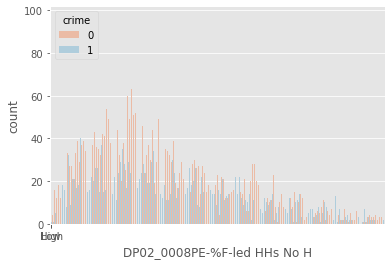

In [95]:
import seaborn as sns
plt.figure()
sns.countplot(x='DP02_0008PE-%F-led HHs No H', hue='crime', data=df_ML_cleaned_WithCrime, palette='RdBu')
plt.xticks([0,1], ['Low', 'High'])
plt.show()

In [ ]:
df_ML_cleaned_WithCrime[1:10]

In [ ]:
df_ML_cleaned_WithCrime_WithSCT[1:10]